https://realpython.com/generate-images-with-dalle-openai-api/

https://platform.openai.com/docs/guides/images/introduction?context=node
https://platform.openai.com/docs/api-reference/images

In [1]:
pip install Pillow


[notice] A new release of pip available: 22.3.1 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import openai
from openai import OpenAI

import os
import json
import base64
import io
import time
import uuid

from IPython.display import Image, display
from PIL import Image as PILImage

from pathlib import Path

In [3]:
#os.environ["OPENAI_API_KEY"] = ''

client = OpenAI()

https://platform.openai.com/docs/api-reference/images/create

- Model defaults to dall-e-2
- Response format defaults to URL
- n can be between 1 and 10 for dall-e-2

In [6]:
response = client.images.generate(
    prompt = "A Golden Retriever holding a flower bouquet in its mouth",
    n = 1,
    size = "256x256"
)

response

ImagesResponse(created=1719312146, data=[Image(b64_json=None, revised_prompt=None, url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-PiVQ9Mh73T48kFyH590gvoKy/user-KL844q3HmfaBqh4EwLgwA5IC/img-KWeuzUd0VRJDmXQrxpjRyvIt.png?st=2024-06-25T09%3A42%3A26Z&se=2024-06-25T11%3A42%3A26Z&sp=r&sv=2023-11-03&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-06-24T16%3A54%3A52Z&ske=2024-06-25T16%3A54%3A52Z&sks=b&skv=2023-11-03&sig=dOqYsIJDbhSHIvnPhuhQwV/Lp/Oh3gLhzC4PNlJQ7xM%3D')])

In [7]:
Image(url=response.data[0].url)

##### b64_json scheme used to represent binary data, such as images or files, as ASCII text characters.

In [8]:
response = client.images.generate(
    prompt = "A Labrador Retriever playing cricket on a cricket pitch",
    n = 1,
    size = "256x256",
    response_format = "b64_json"
)

response

ImagesResponse(created=1719312198, data=[Image(b64_json='iVBORw0KGgoAAAANSUhEUgAAAQAAAAEACAIAAADTED8xAAAAbGVYSWZNTQAqAAAACAACknwAAgAAAC0AAAAmkoYAAgAAABgAAABUAAAAAE9wZW5BSS0tcmVxXzcyOTY0NDIwNGQzY2NhMjRkZjQ0YWYyYWRiMDMyNjI0AABNYWRlIHdpdGggT3BlbkFJIERBTEwtRQBxVddCAAEAAElEQVR4AQArgdR+AXh+RAEBAf8AAAICAgAB//7//gYDBv7/AP7//gMDAfn6+QUFBgcICvr7+gQFBAEAAfj49v39/P8A/wcGBwQDA/7+/wQCBQAA//38/AMEA/z+/AICAf3+/v8A/QEAAQMCAwYFBf/8/AYGBgUEBfb39gUDBf3+/QADAQIBAfv8/Pf6+AYFBf79/vr7+v7+/QgHBgEA//n7/PwA/QQFAwMBAAAAAAsHCgoECOvz8f8AAQYFBgQDA/z9/f//APr7+gECAQAAAf8AAQMBAgIBAwgHCfr6+vv9+v4A/QcHBvv7/fr5+QECAf7+/QD//wYFBQEEAvz9/v4AAAIBA/78/AYEBPj5+fr8+REQDvz5+gAA//3/AAQFBQIBAwEDAvv7+wEBAP7+/gUEAwEAAv77//39/AECAgYFBQIDAv3+/AAAAgICAf7+APz+/f0A/fr4+f7////+/QEBAQYFBgYFCAIDA/r6+v7+/gAA/wECAv/+/AUFBf8A/vz7/f///gMDAwYGB/z8/P7+/QICBAIBAwEB/wAAAgEAAv///v8B//n5+QAB/gIBAf7//wICAwEA////AAIBA/8BAQD/AQEAAQQCBAcCBgMDA/7///4A/vv++f3++gMDBgIDBf7//f3+/wMDAv7//fr5+AD/AAEDAQH/AAAA/wEBAgAAAQD//wMCAwEBAwMCAvz+/P3++////wABAf/+AP///wMEAv/

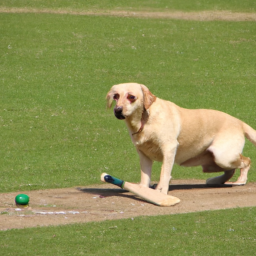

In [9]:
image_data = base64.b64decode(response.data[0].b64_json)

image = PILImage.open(io.BytesIO(image_data))

display(image)

- model (‘dall-e-2’ or ‘dall-e-3’): This is the model you’re generating with. Be careful to set it to ‘dall-e-3’ as it defaults to ‘dall-e-2’ if empty.
- style (‘natural’ or ‘vivid’): The style of the generated images. Must be one of vivid or natural. Vivid causes the model to lean towards generating hyper-real and dramatic images. Natural causes the model to produce more natural, less hyper-real looking images. Defaults to ‘vivid’.
- quality (‘standard’ or ‘hd’): The quality of the image that will be generated. ‘hd’ creates images with finer details and greater consistency across the image. Defaults to ‘standard’.

In [11]:
def generate_images(
    prompt, model="dall-e-2",
    n=1, size="256x256",
    style="vivid", quality="standard"
):
    response = client.images.generate(
        prompt = prompt,
        model = model,
        n = n,
        size = size,
        style = style,
        quality = quality
    )

    image_urls = [entry.url for entry in response.data]

    return image_urls

In [13]:
prompt = """
    A living room with shag carpeting, wood paneling, and a console TV
"""

image_urls = generate_images(prompt)

for url in image_urls:
    display(Image(url=url))

In [14]:
prompt = """
    An early personal computer like the Commodore PET or Apple II
"""

image_urls = generate_images(prompt, model='dall-e-3', size='1024x1024')

for url in image_urls:
    display(Image(url=url))

In [15]:
prompt = """
    A Dalmatian painting its own spots with a paintbrush
"""

image_urls = generate_images(prompt, model='dall-e-3', size='1024x1024', style='natural')

for url in image_urls:
    display(Image(url=url))

In [16]:
prompt = """
   Forced perspective shot making a small dog appear giant in a cityscape
"""

image_urls = generate_images(
    prompt, model='dall-e-3', size='1024x1024',
    style='natural', quality = 'hd'
)

for url in image_urls:
    display(Image(url=url))

DAll-E-2 images are not as good as Dall-E-3 images

In [21]:
prompt = """
    Create a fantastical underground scene from 'Journey to the Center of the Earth'. 
    In the foreground, show three Victorian-era explorers - an older professor, his nephew, 
    and their guide - wearing 19th-century clothing and carrying antique scientific instruments. 
    They stand on a rocky outcrop, gazing in awe at a vast subterranean cavern. The cavern should be 
    illuminated by an eerie, blue-green bioluminescent glow emanating from giant mushrooms and 
    strange plants. In the middle distance, depict a prehistoric landscape with lush primordial 
    vegetation and a placid underground lake reflecting the cavern's ceiling. On the far shore, 
    include silhouettes of dinosaur-like creatures. The ceiling of the cavern should be dotted 
    with glowing crystals, giving the impression of an underground night sky. Incorporate steampunk 
    elements like brass and copper in the explorers' equipment to enhance the 
    Victorian sci-fi atmosphere.
"""
num_images = 2

image_size = "1024x1024"

image_urls = generate_images(prompt, n=num_images, size=image_size)

for url in image_urls:
    display(Image(url=url))

In [20]:
num_images = 1

image_size = "1024x1024"

image_urls = generate_images(prompt, model='dall-e-3', n=num_images, size=image_size)

for url in image_urls:
    display(Image(url=url))

In [24]:
prompt = """
    Two cute dogs dancing together
"""

num_images = 2

image_size = "512x512"

image_urls = generate_images(prompt, n=num_images, size=image_size)

for url in image_urls:
    display(Image(url=url))

In [25]:
def generate_variation_image_urls(
    reference_image_path, num_images=1, image_size="256x256"
):
    response = client.images.create_variation(
        image = open(reference_image_path, "rb"),
        n = num_images,
        size = image_size
    )

    image_urls = [entry.url for entry in response.data]

    return image_urls

In [27]:
num_images = 5
image_size = "512x512"
reference_image_path = 'images/dogs_swing.png'

image_urls = generate_variation_image_urls(
    reference_image_path, num_images, image_size)

for url in image_urls:
    display(Image(url=url))

https://unsplash.com/photos/a-path-in-a-park-lined-with-trees-K2AWz4lXrAM

Also known as "inpainting", the image edits endpoint allows you to edit or extend an image by uploading an image and mask indicating which areas should be replaced. The transparent areas of the mask indicate where the image should be edited, and the prompt should describe the full new image, not just the erased area.

### TODO Recording:

- First show the images on your machine
- nature.png and nature_mask.png

In [37]:
def edit_image(image_path, mask_path, prompt, num_images=1, image_size="512x512"):
    response = client.images.edit(
        image = open(image_path, "rb"),
        mask = open(mask_path, "rb"),
        prompt = prompt,
        n = num_images,
        size = image_size
    )

    image_urls = [entry.url for entry in response.data]

    return image_urls

In [38]:
image_path = "masked_images/beach.png"
mask_path = "masked_images/beach_with_mask.png"

prompt = "A woman in Victorian dress is looking out at the ocean"

In [39]:
image_urls = edit_image(image_path, mask_path, prompt, num_images = 2)

for url in image_urls:
    display(Image(url=url))